### Decsde by Decade Statistics Analysis
##### Cameron Jarnot (cmj36)

In [ ]:
# Imports (update throughout as necessary)
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt # just to format confusion matrix

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

import re

#### Data loading and cleaning

Notes:
* No null values found
* No duplicate values found

In [ ]:
# Data loading
data10 = pd.read_csv('./datasets/dataset-of-10s.csv')
data00 = pd.read_csv('./datasets/dataset-of-00s.csv')
data90 = pd.read_csv('./datasets/dataset-of-90s.csv')
data80 = pd.read_csv('./datasets/dataset-of-80s.csv')
data70 = pd.read_csv('./datasets/dataset-of-70s.csv')
data60 = pd.read_csv('./datasets/dataset-of-60s.csv')

In [ ]:
# Data cleaning

# Drop all na values
data10 = data10.dropna()
data00 = data00.dropna()
data90 = data90.dropna()
data80 = data80.dropna()
data70 = data70.dropna()
data60 = data60.dropna()


# Add a decades column to each dataset (will be helpful when creating cumulative dataset)
data10['decade'] = [2010]*len(data10)
data00['decade'] = [2000]*len(data00)
data90['decade'] = [1990]*len(data90)
data80['decade'] = [1980]*len(data80)
data70['decade'] = [1970]*len(data70)
data60['decade'] = [1960]*len(data60)

In [ ]:
# Check for duplicates in dataset
merged = data10.merge(data00,on=['track','artist'])
merged = merged.merge(data90,on=['track','artist'])
merged = merged.merge(data80,on=['track','artist'])
merged = merged.merge(data70,on=['track','artist'])
merged = merged.merge(data60,on=['track','artist'])
merged
# NOTE: No duplicates found

,uri_x,danceability_x,energy_x,key_x,loudness_x,mode_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,...,instrumentalness_y,liveness_y,valence_y,tempo_y,duration_ms_y,time_signature_y,chorus_hit_y,sections_y,target_y,decade_y


In [ ]:
# Create cumulative dataset (from songs across all decades)
data = data10.append(data00,ignore_index=True).append(data90,ignore_index=True).append(data80,ignore_index=True).append(data70,ignore_index=True).append(data60,ignore_index=True)
data.head()
data.tail()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
41101,Le ire di Ursus,Giampiero Boneschi,spotify:track:3dVgolCVuNgecU5jovpc45,0.420,0.8730,3,-11.689,1,0.1000,0.808,0.879000,0.363,0.183,119.821,26244,4,0.00000,2,0,1960
41102,A-B-C,John Zacherle,spotify:track:0zXhzKf4raEYstebL7L42C,0.716,0.7420,10,-5.727,0,0.2420,0.663,0.000000,0.107,0.834,135.104,142987,4,28.34316,10,0,1960
41103,Useless Landscape,Antônio Carlos Jobim,spotify:track:2uC02PCRVM6BhAaK7dgxxp,0.361,0.0944,10,-22.663,1,0.0327,0.940,0.000178,0.115,0.139,92.472,137200,4,56.63498,6,0,1960
41104,Vendedor De Assaí,Ary Lobo,spotify:track:0gpSUWZWNIRrEenaC1ZGk9,0.452,0.7590,4,-7.821,0,0.1750,0.658,0.000000,0.738,0.853,137.976,159107,3,28.24372,9,0,1960
41105,Mambo Simphony - Remasterizado,Orquesta Casino De La Playa,spotify:track:5j0G0nkCSPlmSCSgXchMn3,0.554,0.2780,5,-8.386,1,0.0349,0.928,0.922000,0.136,0.428,131.401,164227,4,37.39251,8,0,1960


In [ ]:
# Add custom columns that will be useful later

# Duration of song in seconds
data["duration_sec"] = np.round(data["duration_ms"]*(1/1000))
data["duration_sec"]

# Loudness of sound (rounded)
data["loudness_rounded"] = np.round(data["loudness"])
data["loudness_rounded"]

0        -5.0
1       -15.0
2        -7.0
3        -6.0
4        -4.0
         ... 
41101   -12.0
41102    -6.0
41103   -23.0
41104    -8.0
41105    -8.0
Name: loudness_rounded, Length: 41106, dtype: float64

#### Decade by decade statistical analysis
Analysis of relationships between each column and 'hits' vs 'flops' for each decade

Notes:
* Results are stored in dataframe named "decade_by_decade"

In [ ]:
# Target proportion versus duration in seconds.
decades = [data60,data70,data80,data90,data00,data10]
years = ['1960','1970','1980','1990','2000','2010']

Text(0.5, 1.0, 'Duration Resulting in Highest Proportion Hits Across Decades 1960-2010')

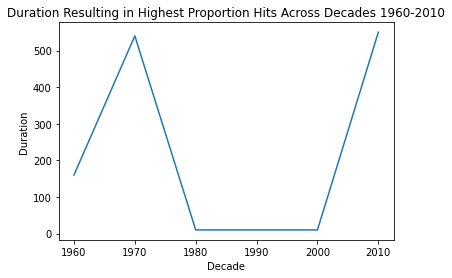

In [ ]:
# Decade by decade stat analysis (relationships between each decade and each column)
# Cameron
durations = []
for decade in [data60,data70,data80,data90,data00,data10]:
    decade['duration_sec'] = data60['duration_ms']//1000
    relevant = decade['duration_sec']
    bin_max = decade["duration_sec"].max()
    i = 1
    bin_arr = []
    while i * 10 < bin_max+10:
        bin_arr.append(i*10)
        i+=1
    bins = pd.cut(decade['duration_sec'], bin_arr)
    hitsDuration = decade.groupby(bins)['target'].agg(["mean", "count"]).reset_index().dropna()

    hitsDurationSliced = hitsDuration[:82]
    hitsDurationSliced.insert(0, 'ds_int', range(1, 1+ len(hitsDurationSliced)))
    hitsDurationSliced["ds_int"] = hitsDurationSliced["ds_int"] *10
    durations += [hitsDurationSliced]
maxDurs = []
# print(durations)
for dur in durations:
    maxDurs += [dur['ds_int'][dur['mean'].idxmax()]]
# print(maxDurs)
plt.plot(years,maxDurs)
plt.xlabel('Decade')
plt.ylabel('Duration')
plt.title('Duration Resulting in Highest Proportion Hits Across Decades 1960-2010')

Text(0.5, 1.0, 'Loudness Resulting in Highest Proportion Hits Across Decades 1960-2010')

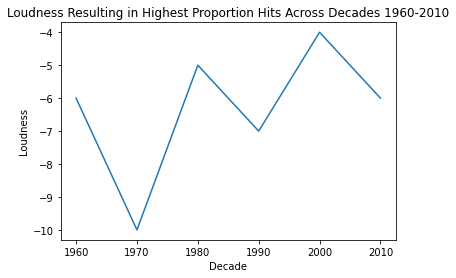

In [ ]:
louds = []
for decade in [data60,data70,data80,data90,data00,data10]:
    decade['loudness_rounded'] = round(decade['loudness'])
    hitsLoudness = decade.groupby("loudness_rounded")['target'].agg(["mean", "count"]).reset_index().dropna()
    hitsLoudness = hitsLoudness.loc[hitsLoudness['count'] > 10]
    louds += [hitsLoudness]
maxLoud = []
for dur in louds:
    maxLoud += [dur['loudness_rounded'][dur['mean'].idxmax()]]
plt.plot(years,maxLoud)
plt.xlabel('Decade')
plt.ylabel('Loudness')
plt.title('Loudness Resulting in Highest Proportion Hits Across Decades 1960-2010')

Text(0.5, 1.0, 'Energy Resulting in Highest Proportion Hits Across Decades 1960-2010')

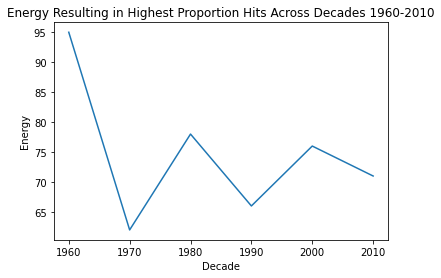

In [ ]:
energies = []
for decade in [data60,data70,data80,data90,data00,data10]:
    i = 0
    bin_arr_energy = []
    while i <= 100:
        bin_arr_energy.append(i/100)
        i+=1
    bins_energy = pd.cut(decade['energy'], bin_arr_energy)
    hitsEnergy = decade.groupby(bins_energy)['target'].agg(["mean", "count"]).reset_index().dropna()
    hitsEnergy.insert(0, 'en_int', range(0, 100))
    hitsEnergy["en_int"] = hitsEnergy["en_int"] / 100
    energies += [hitsEnergy]
maxEnergies = []
for en in energies:
    maxEnergies += [en['mean'].idxmax()]
# print(maxEnergies)
plt.plot(years,maxEnergies)
plt.xlabel('Decade')
plt.ylabel('Energy')
plt.title('Energy Resulting in Highest Proportion Hits Across Decades 1960-2010')

Text(0.5, 1.0, 'Danceability Resulting in Highest Proportion Hits Across Decades 1960-2010')

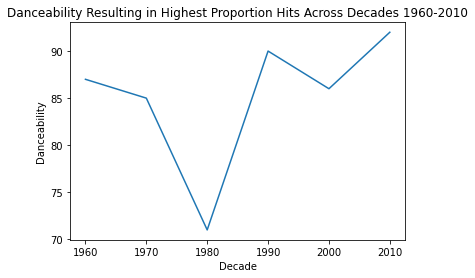

In [ ]:
dances = []
for decade in [data60,data70,data80,data90,data00,data10]:
    # print(decade)
    i = 5
    bin_arr_danceability = []
    while i <= 98:
        bin_arr_danceability.append(i/100)
        i+=1

    bins_danceability = pd.cut(decade['danceability'], bin_arr_danceability)
    target_prop_by_danceability = decade.groupby(bins_danceability)['target'].agg(["mean", "count"]).reset_index().dropna()

    minDance = decade['danceability'].min()*100
    maxDance = decade['danceability'].max()*100
    target_prop_by_danceability.insert(0, 'da_int', decade['danceability']*100)
    target_prop_by_danceability['da_int'] = target_prop_by_danceability['da_int']/100

    dances += [target_prop_by_danceability]
maxDances = []
for dan in dances:
    maxDances += [dan['mean'].idxmax()]
plt.plot(years,maxDances)
plt.xlabel('Decade')
plt.ylabel('Danceability')
plt.title('Danceability Resulting in Highest Proportion Hits Across Decades 1960-2010')

Text(0.5, 1.0, 'Valence Resulting in Highest Proportion Hits Across Decades 1960-2010')

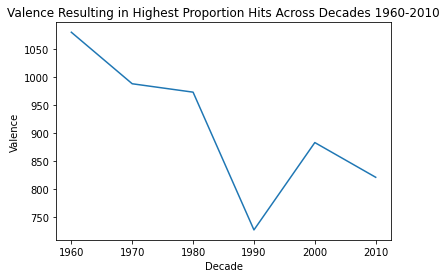

In [ ]:
vals = []
for decade in [data60,data70,data80,data90,data00,data10]:
    target_prop_by_valence = decade.groupby("valence")['target'].agg(["mean", "count"]).reset_index().dropna()
    target_prop_by_valence = target_prop_by_valence.loc[target_prop_by_valence['count'] > 10]
    vals += [target_prop_by_valence]
maxVals = []
for val in vals:
    maxVals += [val['mean'].idxmax()]
plt.plot(years,maxVals)
plt.xlabel('Decade')
plt.ylabel('Valence')
plt.title('Valence Resulting in Highest Proportion Hits Across Decades 1960-2010')

Text(0.5, 1.0, 'Mode Resulting in Highest Proportion Hits Across Decades 1960-2010')

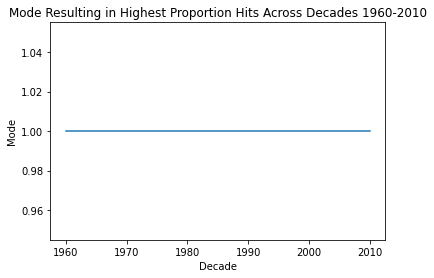

In [ ]:
modes = []
for decade in [data60,data70,data80,data90,data00,data10]:
    target_prop_by_mode = data.groupby("mode")['target'].agg(["mean", "count"]).reset_index().dropna()
    modes += [target_prop_by_mode]
maxModes = []
for mode in modes:
    maxModes += [mode['mean'].idxmax()]
plt.plot(years,maxModes)
plt.xlabel('Decade')
plt.ylabel('Mode')
plt.title('Mode Resulting in Highest Proportion Hits Across Decades 1960-2010')

Text(0.5, 1.0, 'Time Signature Resulting in Highest Proportion Hits Across Decades 1960-2010')

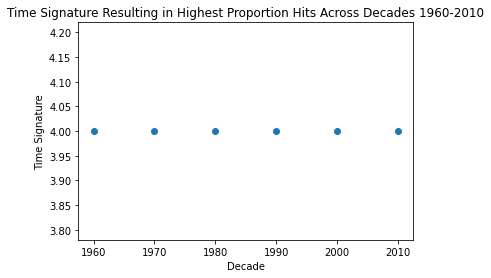

In [ ]:
timeSigs = []
for decade in [data60,data70,data80,data90,data00,data10]:
    target_prop_by_time_signature = data.groupby("time_signature")['target'].agg(["count"]).sort_values(by='count',ascending=False).reset_index().dropna()
    timeSigs += [target_prop_by_time_signature.loc[0,'time_signature']]
plt.scatter(years,timeSigs)
plt.xlabel('Decade')
plt.ylabel('Time Signature')
plt.title('Time Signature Resulting in Highest Proportion Hits Across Decades 1960-2010')

In [ ]:
# Add plots with data from decade by decade stat analysis
# Cameron

# Plot maximum hit proportion for each variable across the decades

# pd.crosstab(data['decade'],data['target']).plot.bar(stacked = True)""

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=162d76af-48a2-4f75-9aef-34643a48aa39' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>